# Differential Privacy and Moment Accountant

AIJack supports Moment Accountant for Differential Privacy with python or c++ backend. C++ backend is much faster but numerically unstable. We will improve these imeplementations as soon as possible.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt

from aijack.defense import GeneralMomentAccountant

## Get $ϵ$

In [2]:
# get epsilon

result_a = []
result_b = []
result_c = []

iterations = 100
noise_multiplier = 5.0
delta = 1e-5

for i in range(1, 101):
    sampling_rate = i / 100

    ga = GeneralMomentAccountant(
        noise_type="Gaussian",
        search="ternary",
        precision=0.01,
        order_max=0,
        order_min=72,
        bound_type="rdp_upperbound_closedformula",
        backend="python",
    )

    ga.reset_step_info()
    ga.add_step_info({"sigma": noise_multiplier}, sampling_rate, iterations)
    temp = ga.get_epsilon(delta)
    result_a.append(temp)

    ga = GeneralMomentAccountant(
        noise_type="Gaussian",
        search="greedy",
        precision=0.001,
        orders=list(range(2, 64)),
        bound_type="rdp_tight_upperbound",
    )

    ga.reset_step_info()
    ga.add_step_info({"sigma": noise_multiplier}, sampling_rate, iterations)
    temp = ga.get_epsilon(delta)
    result_b.append(temp)

    ga = GeneralMomentAccountant(
        noise_type="Gaussian",
        search="ternary",
        precision=0.01,
        order_max=0,
        order_min=72,
        bound_type="rdp_upperbound_closedformula",
        backend="cpp",
    )

    ga.reset_step_info()
    ga.add_step_info({"sigma": noise_multiplier}, sampling_rate, iterations)
    temp = ga.get_epsilon(delta)
    result_c.append(temp)

/usr/local/lib/python3.7/dist-packages/aijack/defense/dp/manager/accountant.py:160: RuntimeWarning: invalid value encountered in log
  + np.log((order - 1) / order)


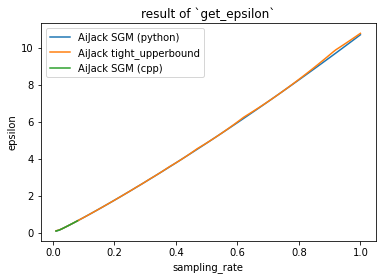

In [3]:
plt.plot([i / 100 for i in range(1, 101)], result_a, label="AiJack SGM (python)")
plt.plot([i / 100 for i in range(1, 101)], result_b, label="AiJack tight_upperbound")
plt.plot([i / 100 for i in range(1, 101)], result_c, label="AiJack SGM (cpp)")
plt.title("result of `get_epsilon`")
plt.xlabel("sampling_rate")
plt.ylabel("epsilon")
plt.legend()

## Get $σ$

In [4]:
ga = GeneralMomentAccountant(
    noise_type="Gaussian",
    search="greedy",
    precision=0.001,
    orders=list(range(2, 64)),
    bound_type="rdp_tight_upperbound",
)

ga_1 = GeneralMomentAccountant(
    noise_type="Gaussian",
    search="ternary",
    precision=0.001,
    order_max=0,
    order_min=72,
    bound_type="rdp_upperbound_closedformula",
)

print(ga.get_noise_multiplier("sigma", 1, 1e-5, 0.01, 100))
print(ga_1.get_noise_multiplier("sigma", 1, 1e-5, 0.01, 100))

4.130859375
4.130859375
